# Ensemble Learning

# Load Libraries

In [1]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the MNIST dataset

In [2]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# EDA Phase

In [3]:
print(mnist.data.shape)

(70000, 784)


In [4]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
mnist.data.isna().any().any()

False

In [7]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

# Split 50,000 instances for training, 10,000 for validation, and 10,000 for testing.

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split( mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=10000, random_state=42)

# Train Random Forest classifier, Extra-Trees classifier, SVM

In [9]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)

estimators = [random_forest_clf, extra_trees_clf, svm_clf]
for estimator in estimators:
    estimator.fit(X_train, y_train)

/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9456, 0.9466, 0.8695]

/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


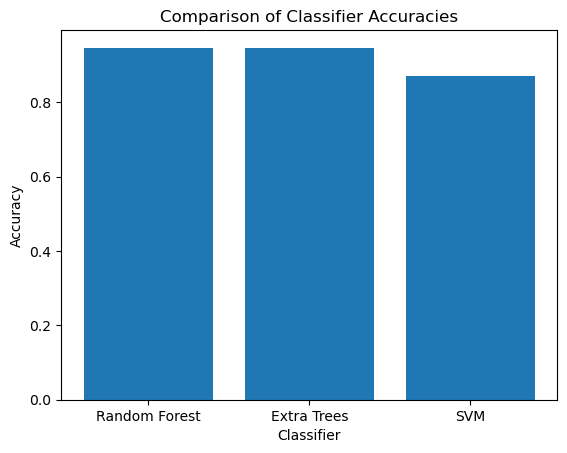

      Classifier  Accuracy
0  Random Forest    0.9456
1    Extra Trees    0.9466
2            SVM    0.8695


In [11]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf]
estimator_names = ['Random Forest', 'Extra Trees', 'SVM']

accuracies = []
for estimator in estimators:
    estimator.fit(X_train, y_train)
    accuracies.append(estimator.score(X_val, y_val))

plt.bar(estimator_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.show()

accuracy_table = pd.DataFrame({'Classifier': estimator_names, 'Accuracy': accuracies})
print(accuracy_table)

In [12]:
named_estimators = [ ("random_forest_clf", random_forest_clf), ("extra_trees_clf", extra_trees_clf), ("svm_clf", svm_clf)]

In [13]:
voting_clf = VotingClassifier(named_estimators)

In [14]:
voting_clf.fit(X_train, y_train)

/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', LinearSVC(random_state=42))])

In [15]:
voting_clf.score(X_val, y_val)

0.951

In [16]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9456, 0.9466, 0.8695]

In [17]:
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', None)])

In [18]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(n_estimators=10, random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(n_estimators=10, random_state=42)),
 ('svm_clf', None)]

In [19]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=10, random_state=42),
 ExtraTreesClassifier(n_estimators=10, random_state=42),
 LinearSVC(random_state=42)]

In [20]:
del voting_clf.estimators_[2]

In [21]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=10, random_state=42),
 ExtraTreesClassifier(n_estimators=10, random_state=42)]

In [22]:
voting_clf.score(X_val, y_val)

0.9414

In [23]:
voting_clf.voting = "soft"
voting_clf.score(X_val, y_val)

0.96

In [24]:
voting_clf.score(X_test, y_test)

0.9574

In [25]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9423, 0.9473]

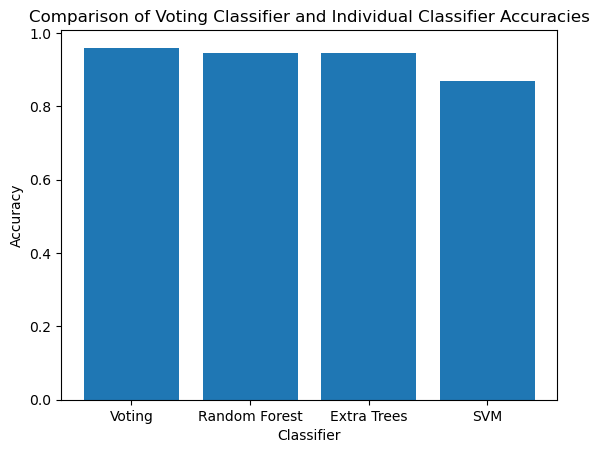

      Classifier  Accuracy
0         Voting    0.9600
1  Random Forest    0.9456
2    Extra Trees    0.9466
3            SVM    0.8695


In [26]:
voting_clf_acc = accuracy_score(y_val, voting_clf.predict(X_val))

plt.bar(['Voting'] + estimator_names, [voting_clf_acc] + accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Voting Classifier and Individual Classifier Accuracies')
plt.show()

accuracy_table_voting = pd.DataFrame({
    'Classifier': ['Voting'] + estimator_names,
    'Accuracy': [voting_clf_acc] + accuracies
})
print(accuracy_table_voting)

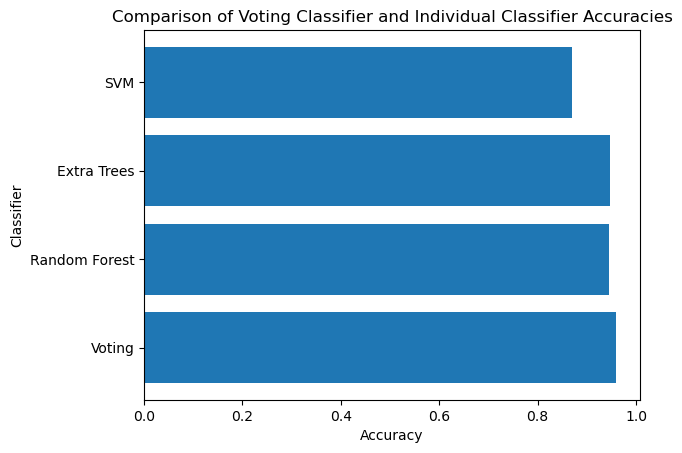

      Classifier  Accuracy
0         Voting    0.9600
1    Extra Trees    0.9466
2  Random Forest    0.9456
3            SVM    0.8695


In [27]:
plt.barh(['Voting'] + estimator_names, [voting_clf_acc] + accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Comparison of Voting Classifier and Individual Classifier Accuracies')
plt.show()

accuracy_table_voting_sorted = accuracy_table_voting.sort_values(by='Accuracy', ascending=False)
print(accuracy_table_voting_sorted.reset_index(drop=True))

In [28]:
clf_bagging = BaggingClassifier( DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.8, bootstrap = True, oob_score=True, n_jobs = -1)
clf_pasting = BaggingClassifier( DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.8, bootstrap = False, n_jobs = -1)

clf_bagging.fit(X_train, y_train)
clf_pasting.fit(X_train, y_train)

y_pred_bagging = clf_bagging.predict(X_val)
y_pred_pasting = clf_bagging.predict(X_val)


clf_bagging.oob_score_, accuracy_score(y_val, y_pred_bagging), accuracy_score(y_val, y_pred_pasting)

/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


(0.90684, 0.9427, 0.9427)

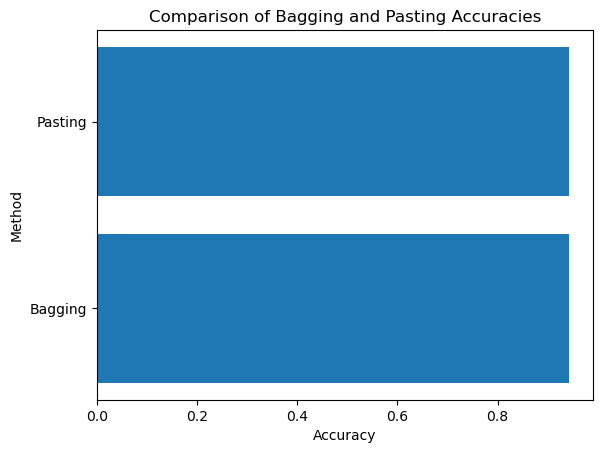

    Method  Accuracy
0  Bagging    0.9427
1  Pasting    0.9427


In [29]:
bagging_acc = accuracy_score(y_val, y_pred_bagging)
pasting_acc = accuracy_score(y_val, y_pred_pasting)

plt.barh(['Bagging', 'Pasting'], [bagging_acc, pasting_acc])
plt.xlabel('Accuracy')
plt.ylabel('Method')
plt.title('Comparison of Bagging and Pasting Accuracies')
plt.show()

accuracy_table_bagging_pasting = pd.DataFrame({
    'Method': ['Bagging', 'Pasting'],
    'Accuracy': [bagging_acc, pasting_acc]
})
print(accuracy_table_bagging_pasting)


In [30]:
clf_bagging.oob_decision_function_[112]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
clf_randomforest = RandomForestClassifier(n_estimators=10, n_jobs=-1)
clf_randomforest.fit(X_train, y_train)
y_pred_rf = clf_randomforest.predict(X_val)

accuracy_score(y_val, y_pred_rf)

0.9483

In [32]:
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_val)
accuracy_score(y_val, y_pred_ada)

0.7917

In [33]:
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [35]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [36]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [37]:

X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [38]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [39]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [40]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

<Figure size 1100x1100 with 0 Axes>

<Figure size 1100x1100 with 0 Axes>

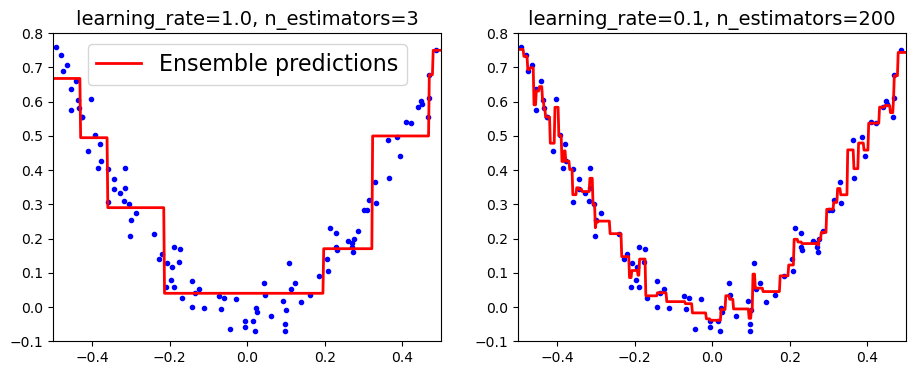

In [41]:

plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

#save_fig("gbrt_learning_rate_plot")
plt.show()

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=84)

In [43]:
min_error = np.min(errors)

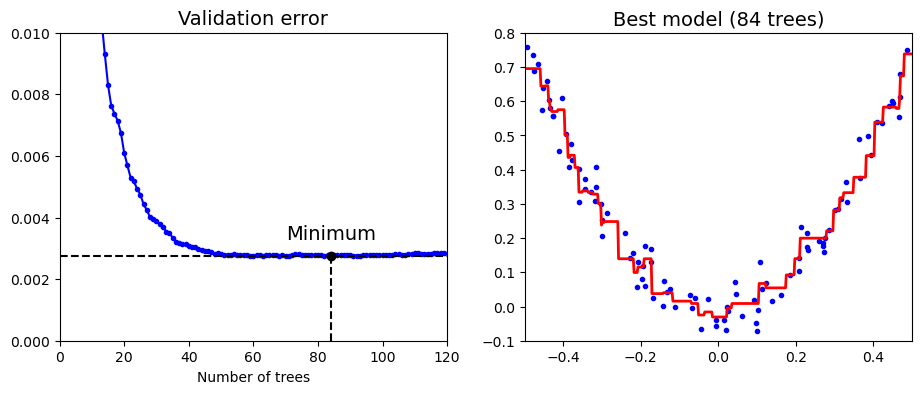

In [44]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

In [45]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [46]:
print(gbrt.n_estimators)

69


In [47]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.0027502790333457173


In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [49]:
X_train_val, X_test, y_train_val, y_test = train_test_split( mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=10000, random_state=42)

In [50]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)

In [51]:
estimators = [random_forest_clf, extra_trees_clf,svm_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(n_estimators=10, random_state=42)
Training the ExtraTreesClassifier(n_estimators=10, random_state=42)
Training the LinearSVC(random_state=42)


/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9456, 0.9466, 0.8695]

In [53]:
scores = []
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)
    score = estimator.score(X_val, y_val)
    scores.append(score)

print(scores)

Training the RandomForestClassifier(n_estimators=10, random_state=42)
Training the ExtraTreesClassifier(n_estimators=10, random_state=42)
Training the LinearSVC(random_state=42)
[0.9456, 0.9466, 0.8695]


/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
val_accuracies = [estimator.score(X_val, y_val) for estimator in estimators]

accuracy_table = pd.DataFrame({
    'Classifier': estimator_names,
    'Validation Accuracy': val_accuracies
})

print(accuracy_table)

      Classifier  Validation Accuracy
0  Random Forest               0.9456
1    Extra Trees               0.9466
2            SVM               0.8695


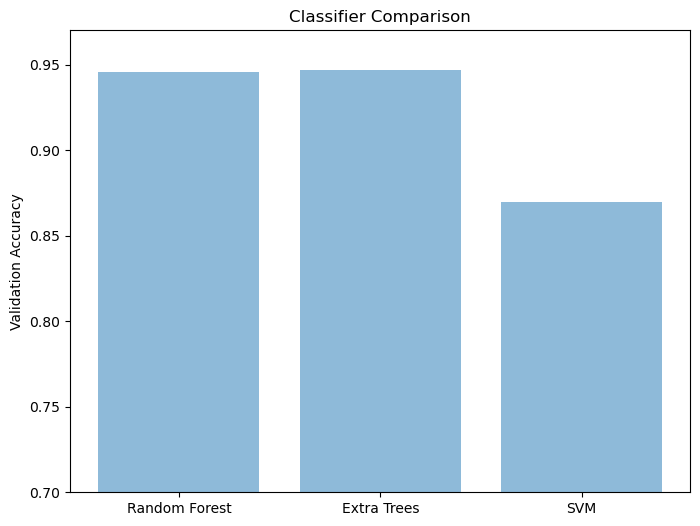

In [55]:
plt.figure(figsize=(8,6))
labels = ['Random Forest', 'Extra Trees', 'SVM']
y_pos = np.arange(len(labels))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Validation Accuracy')
plt.title('Classifier Comparison')
plt.ylim([0.70, 0.97])
plt.show()

/Users/ehsanap/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


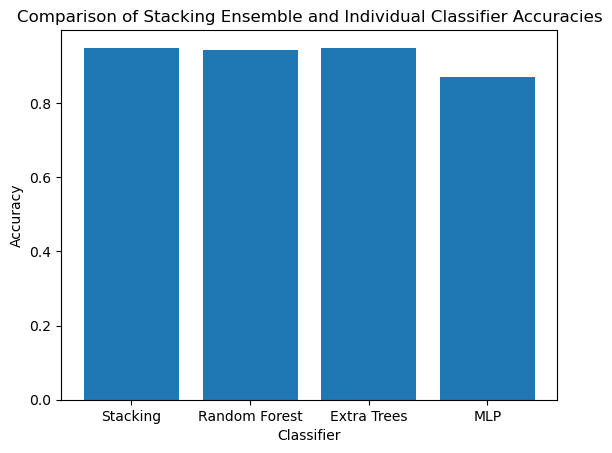

      Classifier  Accuracy
0       Stacking    0.9489
1  Random Forest    0.9423
2    Extra Trees    0.9473
3            MLP    0.8707


In [56]:
for estimator in estimators:
    estimator.fit(X_train, y_train)

X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

y_pred = rnd_forest_blender.predict(X_test_predictions)
stacking_acc = accuracy_score(y_test, y_pred)

individual_accuracies = [accuracy_score(y_test, estimator.predict(X_test)) for estimator in estimators]

estimator_names = ["Random Forest", "Extra Trees", "MLP"]

plt.bar(['Stacking'] + estimator_names, [stacking_acc] + individual_accuracies, align='center')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Stacking Ensemble and Individual Classifier Accuracies')
plt.show()

accuracy_table_stacking = pd.DataFrame({
    'Classifier': ['Stacking'] + estimator_names,
    'Accuracy': [stacking_acc] + individual_accuracies
})
print(accuracy_table_stacking)

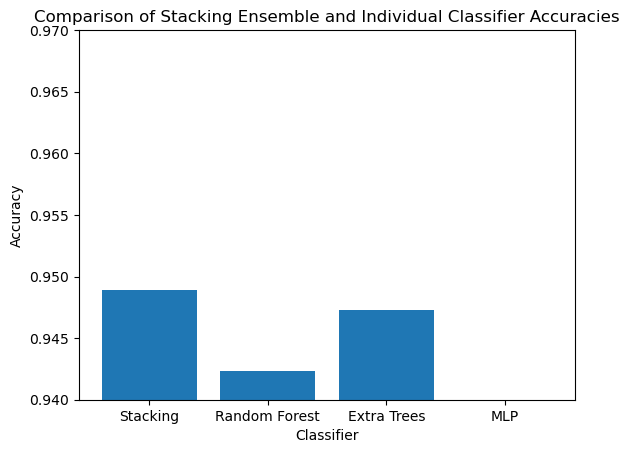

      Classifier  Accuracy
0       Stacking    0.9489
1  Random Forest    0.9423
2    Extra Trees    0.9473
3            MLP    0.8707


In [57]:
plt.bar(['Stacking'] + estimator_names, [stacking_acc] + individual_accuracies, align='center')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0.94, 0.97])
plt.title('Comparison of Stacking Ensemble and Individual Classifier Accuracies')
plt.show()

accuracy_table_stacking = pd.DataFrame({
    'Classifier': ['Stacking'] + estimator_names,
    'Accuracy': [stacking_acc] + individual_accuracies
})
print(accuracy_table_stacking)

In [58]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [59]:
X_val_predictions

array([[5., 5., 5.],
       [8., 8., 8.],
       [2., 2., 2.],
       ...,
       [7., 4., 7.],
       [6., 6., 6.],
       [7., 7., 7.]], dtype=float32)

In [60]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [61]:
rnd_forest_blender.oob_score_

0.9498

In [62]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [63]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [64]:
accuracy_score(y_test, y_pred)

0.9489

In [65]:
stacking=accuracy_score(y_test, y_pred)

In [66]:
stacking

0.9489

In [67]:
bagging=0.9375
random_forest=0.9459
ada_boosting=0.7917
gradient_boosting=0.6900
stacking=0.9651
svm=0.8695

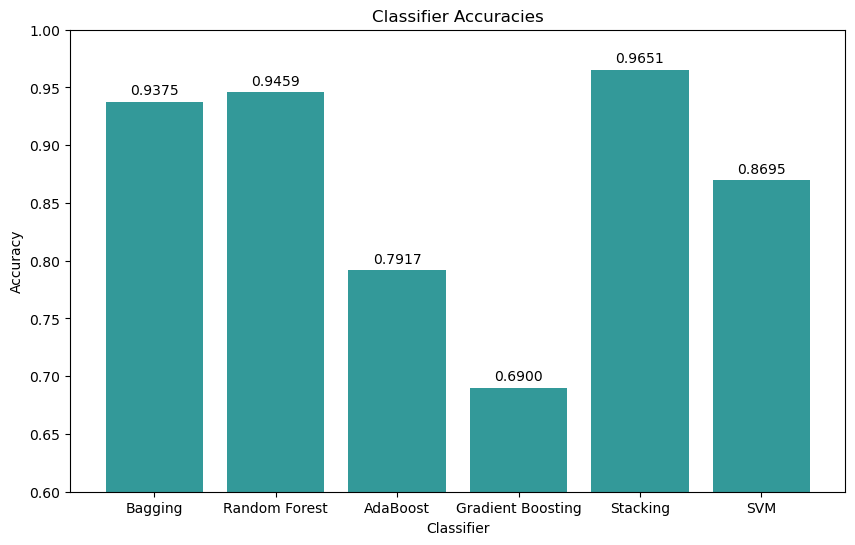

In [68]:
classifier_names = ["Bagging", "Random Forest", "AdaBoost", "Gradient Boosting", "Stacking","SVM"]
accuracies = [0.9375, 0.9459, 0.7917, 0.6900, 0.9651,0.8695]

plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, accuracies, align='center', alpha=0.8, color='teal')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
plt.title('Classifier Accuracies')

for bar in bars:
    height = bar.get_height()
    plt.gca().annotate('{:.4f}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()